# Candidate Nightly Epochs Summary

Author: Melissa Graham

Explore the lightcurves and lightcurve parameters created by `candidate_nightly_epochs.ipynb`.

Plot histograms and correlations of the lightcurve parameters (time span, amplitude, minimum magnitude, number of epochs).

Plot the lightcurves of some samples of candidates (the 25 brightest, largest amplitude, etc.)

In [1]:
# import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [2]:
### Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o','s','*','o','s','*']
siz = [5,5,7,5,5,7]

## Read in the candidate lightcurves

In [3]:
fnm = 'candidate_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
candLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
candLC_caldate = np.loadtxt( fnm, dtype='str', usecols=(2) )
candLC_mjd = np.loadtxt( fnm, dtype='float', usecols=(3) )
candLC_filter = np.loadtxt( fnm, dtype='str', usecols=(4) )
candLC_Nobj = np.loadtxt( fnm, dtype='int', usecols=(5) )
candLC_mag = np.loadtxt( fnm, dtype='float', usecols=(6) )
candLC_mage = np.loadtxt( fnm, dtype='float', usecols=(7) )
candLC_mrb = np.loadtxt( fnm, dtype='float', usecols=(8) )
candLC_maglim = np.loadtxt( fnm, dtype='float', usecols=(9) )

del fnm

Check on the number of unique candidates and epochs in COSMOS and ELAIS.

In [4]:
cx = np.where( candLC_field == 'COSMOS' )[0]
ex = np.where( candLC_field == 'ELAIS' )[0]

all_cosmos_epochs = np.unique( np.sort(candLC_caldate[cx]) )
all_elais_epochs = np.unique( np.sort(candLC_caldate[ex]) )

print( len(all_cosmos_epochs), ' unique COSMOS epochs.' )
print( len(all_elais_epochs), ' unique ELAIS epochs.' )

all_cosmos_candids = np.unique( np.sort(candLC_candid[cx]) )
all_elais_candids = np.unique( np.sort(candLC_candid[ex]) )

print( len(all_cosmos_candids), ' unique COSMOS candidates' )
print( len(all_elais_candids), ' unique ELAIS candidates' )

print( len(all_cosmos_candids)+len(all_elais_candids), ' total' )

del cx,ex

45  unique COSMOS epochs.
39  unique ELAIS epochs.
3660  unique COSMOS candidates
724  unique ELAIS candidates
4384  total


## Read in the candidate lightcurves parameters

In [5]:
fnm = 'candidate_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

How many candidates had just one epoch of detection?

In [6]:
cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps == 0) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps == 0) )[0]
cx_g = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_g == 0) )[0]
ex_g = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_g == 0) )[0]
cx_r = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_r == 0) )[0]
ex_r = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_r == 0) )[0]
cx_i = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_i == 0) )[0]
ex_i = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_i == 0) )[0]

print('Number of candidates with NO epochs (any, g, r, i).')
print('COSMOS: ', len(cx),len(cx_g),len(cx_r),len(cx_i) )
print('ELAIS:  ', len(ex),len(ex_g),len(ex_r),len(ex_i) )
print(' ')
del cx,ex,cx_g,cx_r,cx_i,ex_g,ex_r,ex_i

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps == 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps == 1) )[0]
cx_g = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_g == 1) )[0]
ex_g = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_g == 1) )[0]
cx_r = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_r == 1) )[0]
ex_r = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_r == 1) )[0]
cx_i = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_i == 1) )[0]
ex_i = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_i == 1) )[0]

print('Number of candidates with ONE epoch (any, g, r, i).')
print('COSMOS: ', len(cx),len(cx_g),len(cx_r),len(cx_i) )
print('ELAIS:  ', len(ex),len(ex_g),len(ex_r),len(ex_i) )
del cx,ex,cx_g,cx_r,cx_i,ex_g,ex_r,ex_i

Number of candidates with NO epochs (any, g, r, i).
COSMOS:  0 1092 125 2137
ELAIS:   0 144 75 131
 
Number of candidates with ONE epoch (any, g, r, i).
COSMOS:  19 196 70 396
ELAIS:   6 52 40 67


# Plots

## Histograms of light curve summary parameters

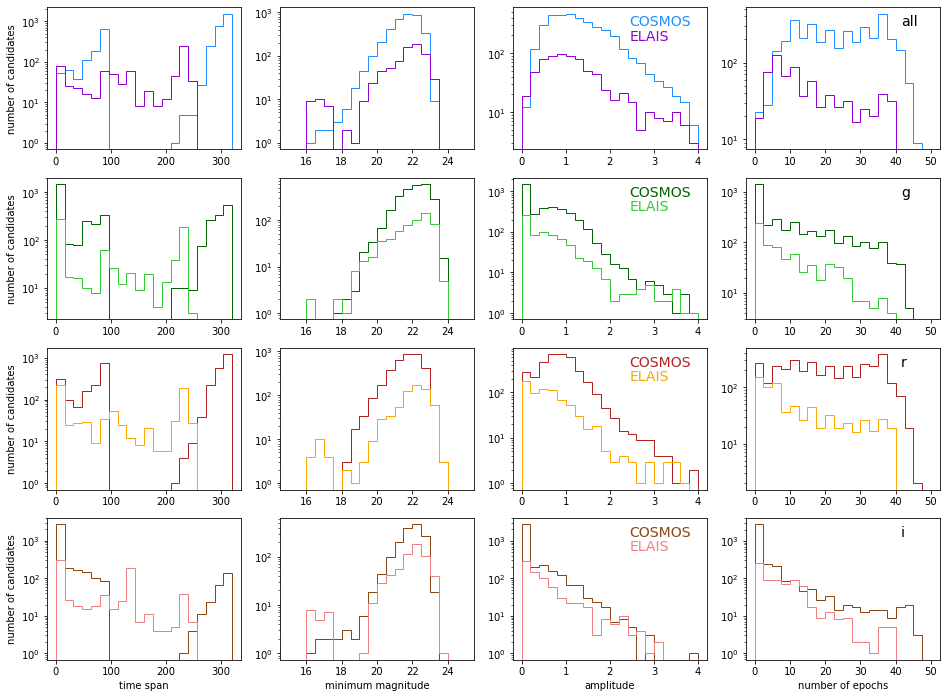

In [7]:
cx = np.where( paramLC_field == 'COSMOS' )[0]
ex = np.where( paramLC_field == 'ELAIS' )[0]

fig, ax = plt.subplots( 4, 4, figsize=(16,12), sharex=False, sharey=False )

ax[0,0].hist( paramLC_tspan[cx],  histtype='step', log=True, bins=20, range=(0,320), color='dodgerblue')
ax[0,1].hist( paramLC_minmag[cx], histtype='step', log=True, bins=20, range=(15,25), color='dodgerblue')
ax[0,2].hist( paramLC_amp[cx],    histtype='step', log=True, bins=20, range=(0,4),   color='dodgerblue')
ax[0,3].hist( paramLC_neps[cx],   histtype='step', log=True, bins=20, range=(0,50),  color='dodgerblue')
ax[0,0].hist( paramLC_tspan[ex],  histtype='step', log=True, bins=20, range=(0,320), color='darkviolet')
ax[0,1].hist( paramLC_minmag[ex], histtype='step', log=True, bins=20, range=(15,25),   color='darkviolet')
ax[0,2].hist( paramLC_amp[ex],    histtype='step', log=True, bins=20, range=(0,4),   color='darkviolet')
ax[0,3].hist( paramLC_neps[ex],   histtype='step', log=True, bins=20, range=(0,50), color='darkviolet')

ax[1,0].hist( paramLC_tspan_g[cx],  histtype='step', log=True, bins=20, range=(0,320), color=clr[0])
ax[1,1].hist( paramLC_minmag_g[cx], histtype='step', log=True, bins=20, range=(15,25), color=clr[0])
ax[1,2].hist( paramLC_amp_g[cx],    histtype='step', log=True, bins=20, range=(0,4),   color=clr[0])
ax[1,3].hist( paramLC_neps_g[cx],   histtype='step', log=True, bins=20, range=(0,50),  color=clr[0])
ax[1,0].hist( paramLC_tspan_g[ex],  histtype='step', log=True, bins=20, range=(0,320), color=clr[3])
ax[1,1].hist( paramLC_minmag_g[ex], histtype='step', log=True, bins=20, range=(15,25), color=clr[3])
ax[1,2].hist( paramLC_amp_g[ex],    histtype='step', log=True, bins=20, range=(0,4),   color=clr[3])
ax[1,3].hist( paramLC_neps_g[ex],   histtype='step', log=True, bins=20, range=(0,50),  color=clr[3])

ax[2,0].hist( paramLC_tspan_r[cx],  histtype='step', log=True, bins=20, range=(0,320), color=clr[1])
ax[2,1].hist( paramLC_minmag_r[cx], histtype='step', log=True, bins=20, range=(15,25), color=clr[1])
ax[2,2].hist( paramLC_amp_r[cx],    histtype='step', log=True, bins=20, range=(0,4),   color=clr[1])
ax[2,3].hist( paramLC_neps_r[cx],   histtype='step', log=True, bins=20, range=(0,50),  color=clr[1])
ax[2,0].hist( paramLC_tspan_r[ex],  histtype='step', log=True, bins=20, range=(0,320), color=clr[4])
ax[2,1].hist( paramLC_minmag_r[ex], histtype='step', log=True, bins=20, range=(15,25), color=clr[4])
ax[2,2].hist( paramLC_amp_r[ex],    histtype='step', log=True, bins=20, range=(0,4),   color=clr[4])
ax[2,3].hist( paramLC_neps_r[ex],   histtype='step', log=True, bins=20, range=(0,50),  color=clr[4])

ax[3,0].hist( paramLC_tspan_i[cx],  histtype='step', log=True, bins=20, range=(0,320), color=clr[2])
ax[3,1].hist( paramLC_minmag_i[cx], histtype='step', log=True, bins=20, range=(15,25), color=clr[2])
ax[3,2].hist( paramLC_amp_i[cx],    histtype='step', log=True, bins=20, range=(0,4),   color=clr[2])
ax[3,3].hist( paramLC_neps_i[cx],   histtype='step', log=True, bins=20, range=(0,50),  color=clr[2])
ax[3,0].hist( paramLC_tspan_i[ex],  histtype='step', log=True, bins=20, range=(0,320), color=clr[5])
ax[3,1].hist( paramLC_minmag_i[ex], histtype='step', log=True, bins=20, range=(15,25), color=clr[5])
ax[3,2].hist( paramLC_amp_i[ex],    histtype='step', log=True, bins=20, range=(0,4),   color=clr[5])
ax[3,3].hist( paramLC_neps_i[ex],   histtype='step', log=True, bins=20, range=(0,50),  color=clr[5])

ax[3,0].set_xlabel('time span')
ax[3,1].set_xlabel('minimum magnitude')
ax[3,2].set_xlabel('amplitude')
ax[3,3].set_xlabel('number of epochs')

ax[0,0].set_ylabel('number of candidates')
ax[1,0].set_ylabel('number of candidates')
ax[2,0].set_ylabel('number of candidates')
ax[3,0].set_ylabel('number of candidates')

ax[0,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color='dodgerblue', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,2].transAxes)    
ax[0,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color='darkviolet', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,2].transAxes)    
ax[1,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[0], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,2].transAxes)    
ax[1,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[3], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,2].transAxes)    
ax[2,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[1], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,2].transAxes)    
ax[2,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[4], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,2].transAxes)    
ax[3,2].text(0.60, 0.85, 'COSMOS', fontsize=14, color=clr[2], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,2].transAxes)    
ax[3,2].text(0.60, 0.75, 'ELAIS',  fontsize=14, color=clr[5], 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,2].transAxes)    

ax[0,3].text(0.80, 0.85, 'all',fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[0,3].transAxes)
ax[1,3].text(0.80, 0.85, 'g',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[1,3].transAxes)
ax[2,3].text(0.80, 0.85, 'r',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[2,3].transAxes)
ax[3,3].text(0.80, 0.85, 'i',  fontsize=14, color='black', 
             verticalalignment='bottom', horizontalalignment='left',  transform=ax[3,3].transAxes)

plt.show()

del cx,ex

## Correlations between lightcurve summary parameters

For candidates with more than one epoch.

Just time span, minimum magnitude, and amplitude.

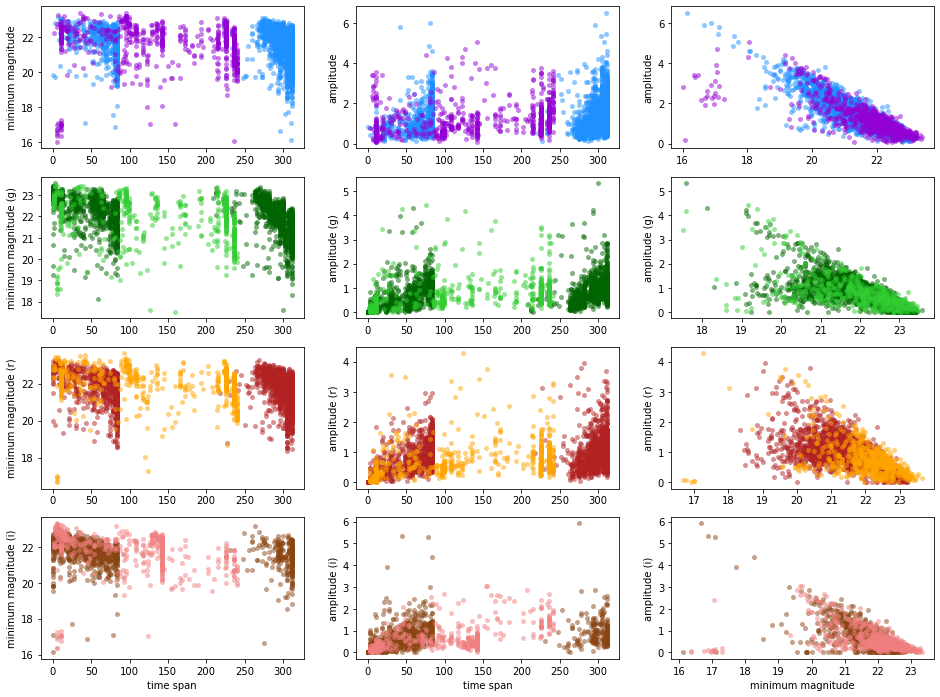

In [8]:
fig, ax = plt.subplots( 4, 3, figsize=(16,12), sharex=False, sharey=False )

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps > 1) )[0]
ax[0,0].plot( paramLC_tspan[cx],  paramLC_minmag[cx], 'o', ms=5, mew=0, alpha=0.5, color='dodgerblue')
ax[0,1].plot( paramLC_tspan[cx],  paramLC_amp[cx],    'o', ms=5, mew=0, alpha=0.5, color='dodgerblue')
ax[0,2].plot( paramLC_minmag[cx], paramLC_amp[cx],    'o', ms=5, mew=0, alpha=0.5, color='dodgerblue')
ax[0,0].plot( paramLC_tspan[ex],  paramLC_minmag[ex], 'o', ms=5, mew=0, alpha=0.5, color='darkviolet')
ax[0,1].plot( paramLC_tspan[ex],  paramLC_amp[ex],    'o', ms=5, mew=0, alpha=0.5, color='darkviolet')
ax[0,2].plot( paramLC_minmag[ex], paramLC_amp[ex],    'o', ms=5, mew=0, alpha=0.5, color='darkviolet')
del cx,ex

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_g > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_g > 1) )[0]
ax[1,0].plot( paramLC_tspan_g[cx],  paramLC_minmag_g[cx], 'o', ms=5, mew=0, alpha=0.5, color=clr[0])
ax[1,1].plot( paramLC_tspan_g[cx],  paramLC_amp_g[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[0])
ax[1,2].plot( paramLC_minmag_g[cx], paramLC_amp_g[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[0])
ax[1,0].plot( paramLC_tspan_g[ex],  paramLC_minmag_g[ex], 'o', ms=5, mew=0, alpha=0.5, color=clr[3])
ax[1,1].plot( paramLC_tspan_g[ex],  paramLC_amp_g[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[3])
ax[1,2].plot( paramLC_minmag_g[ex], paramLC_amp_g[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[3])
del cx,ex

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_r > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_r > 1) )[0]
ax[2,0].plot( paramLC_tspan_r[cx],  paramLC_minmag_r[cx], 'o', ms=5, mew=0, alpha=0.5, color=clr[1])
ax[2,1].plot( paramLC_tspan_r[cx],  paramLC_amp_r[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[1])
ax[2,2].plot( paramLC_minmag_r[cx], paramLC_amp_r[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[1])
ax[2,0].plot( paramLC_tspan_r[ex],  paramLC_minmag_r[ex], 'o', ms=5, mew=0, alpha=0.5, color=clr[4])
ax[2,1].plot( paramLC_tspan_r[ex],  paramLC_amp_r[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[4])
ax[2,2].plot( paramLC_minmag_r[ex], paramLC_amp_r[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[4])
del cx,ex

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_i > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_i > 1) )[0]
ax[3,0].plot( paramLC_tspan_i[cx],  paramLC_minmag_i[cx], 'o', ms=5, mew=0, alpha=0.5, color=clr[2])
ax[3,1].plot( paramLC_tspan_i[cx],  paramLC_amp_i[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[2])
ax[3,2].plot( paramLC_minmag_i[cx], paramLC_amp_i[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[2])
ax[3,0].plot( paramLC_tspan_i[ex],  paramLC_minmag_i[ex], 'o', ms=5, mew=0, alpha=0.5, color=clr[5])
ax[3,1].plot( paramLC_tspan_i[ex],  paramLC_amp_i[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[5])
ax[3,2].plot( paramLC_minmag_i[ex], paramLC_amp_i[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[5])
del cx,ex

ax[0,0].set_ylabel('minimum magnitude')
ax[0,1].set_ylabel('amplitude')
ax[0,2].set_ylabel('amplitude')

ax[1,0].set_ylabel('minimum magnitude (g)')
ax[1,1].set_ylabel('amplitude (g)')
ax[1,2].set_ylabel('amplitude (g)')

ax[2,0].set_ylabel('minimum magnitude (r)')
ax[2,1].set_ylabel('amplitude (r)')
ax[2,2].set_ylabel('amplitude (r)')

ax[3,0].set_xlabel('time span')
ax[3,1].set_xlabel('time span')
ax[3,2].set_xlabel('minimum magnitude')
ax[3,0].set_ylabel('minimum magnitude (i)')
ax[3,1].set_ylabel('amplitude (i)')
ax[3,2].set_ylabel('amplitude (i)')

plt.show()

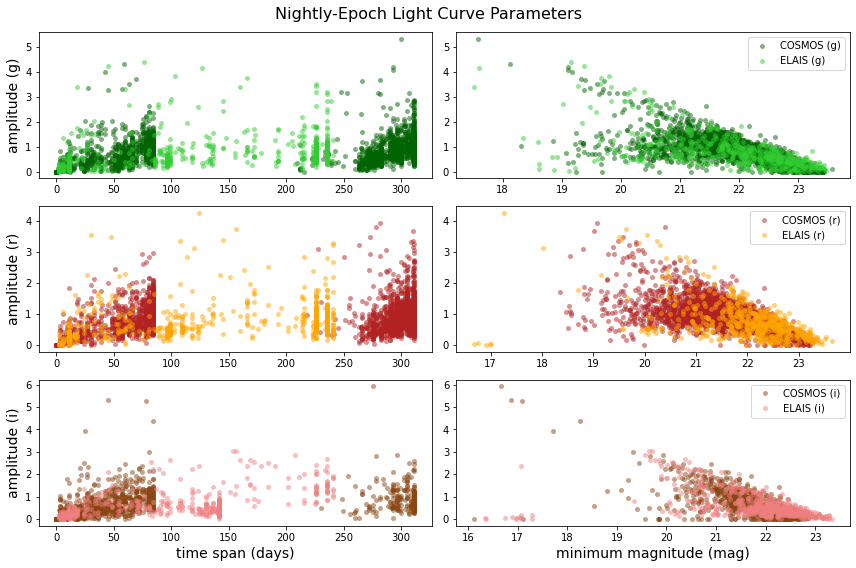

In [9]:
fig, ax = plt.subplots( 3, 2, figsize=(12,8), sharex=False, sharey=False )

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_g > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_g > 1) )[0]
ax[0,0].plot( paramLC_tspan_g[cx],  paramLC_amp_g[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[0])
ax[0,1].plot( paramLC_minmag_g[cx], paramLC_amp_g[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[0], label='COSMOS (g)')
ax[0,0].plot( paramLC_tspan_g[ex],  paramLC_amp_g[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[3])
ax[0,1].plot( paramLC_minmag_g[ex], paramLC_amp_g[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[3], label='ELAIS (g)')
del cx,ex

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_r > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_r > 1) )[0]
ax[1,0].plot( paramLC_tspan_r[cx],  paramLC_amp_r[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[1])
ax[1,1].plot( paramLC_minmag_r[cx], paramLC_amp_r[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[1], label='COSMOS (r)')
ax[1,0].plot( paramLC_tspan_r[ex],  paramLC_amp_r[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[4])
ax[1,1].plot( paramLC_minmag_r[ex], paramLC_amp_r[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[4], label='ELAIS (r)')
del cx,ex

cx = np.where( (paramLC_field == 'COSMOS') & (paramLC_neps_i > 1) )[0]
ex = np.where( (paramLC_field == 'ELAIS') & (paramLC_neps_i > 1) )[0]
ax[2,0].plot( paramLC_tspan_i[cx],  paramLC_amp_i[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[2])
ax[2,1].plot( paramLC_minmag_i[cx], paramLC_amp_i[cx],    'o', ms=5, mew=0, alpha=0.5, color=clr[2], label='COSMOS (i)')
ax[2,0].plot( paramLC_tspan_i[ex],  paramLC_amp_i[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[5])
ax[2,1].plot( paramLC_minmag_i[ex], paramLC_amp_i[ex],    'o', ms=5, mew=0, alpha=0.5, color=clr[5], label='ELAIS (i)')
del cx,ex

ax[0,1].legend(loc='upper right')
ax[1,1].legend(loc='upper right')
ax[2,1].legend(loc='upper right')

ax[0,0].set_ylabel('amplitude (g)', fontsize=14)
ax[1,0].set_ylabel('amplitude (r)', fontsize=14)
ax[2,0].set_ylabel('amplitude (i)', fontsize=14)

ax[2,0].set_xlabel('time span (days)', fontsize=14)
ax[2,1].set_xlabel('minimum magnitude (mag)', fontsize=14)

plt.suptitle('Nightly-Epoch Light Curve Parameters', fontsize=16)
plt.tight_layout()
plt.savefig('candidate_nightly_epochs_summary_figures/nelc_params')
plt.show()

<br>

## Demo: plot lightcurves for some remarkable candidates

In [10]:
all_filters = ['g','r','i']

### The 20 brightest in any filter

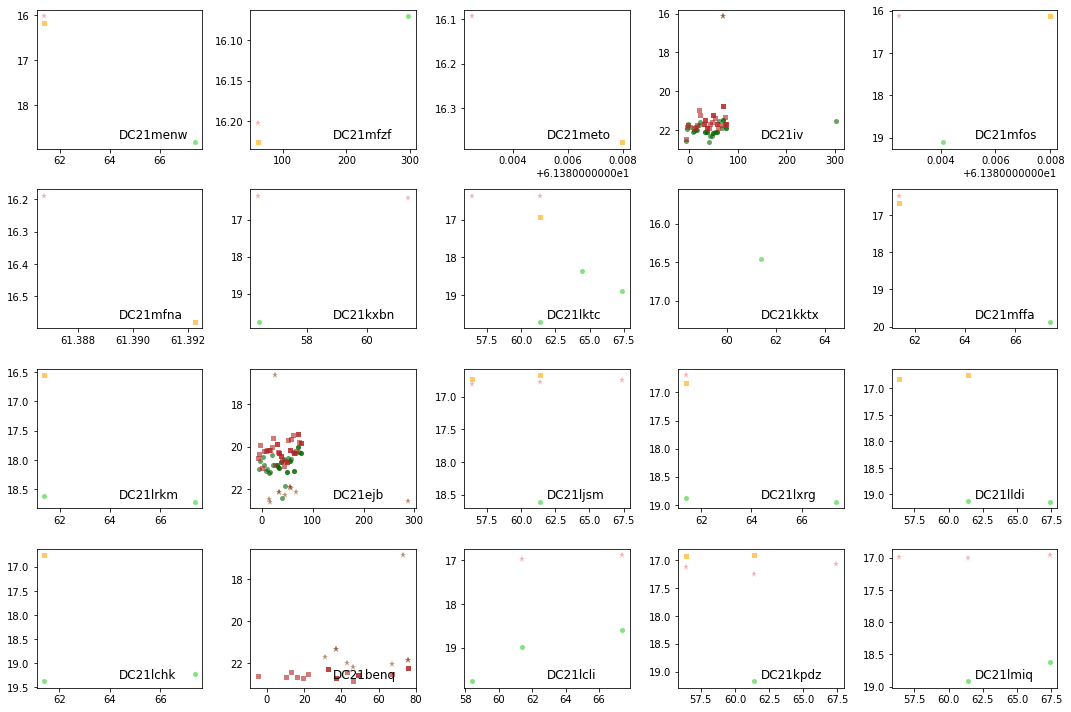

In [20]:
sx = np.argsort( paramLC_minmag )

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            cx = np.where( (candLC_candid == paramLC_candid[sx[s]]) & (candLC_filter == filt) )[0]
            if paramLC_field[sx[s]] == 'COSMOS':
                clr_i = f
            elif paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            ax[i,j].plot( candLC_mjd[cx]-59300., candLC_mag[cx], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            del cx
        ax[i,j].invert_yaxis()
        ax[i,j].text(0.50, 0.05, paramLC_candid[sx[s]], fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### The 20 largest amplitude in the _g_ filter

**Warning**: use amplitude _in a filter_ as the demo here, because "the amplitude in _any_ filter" can be due more to color than change in brightness.

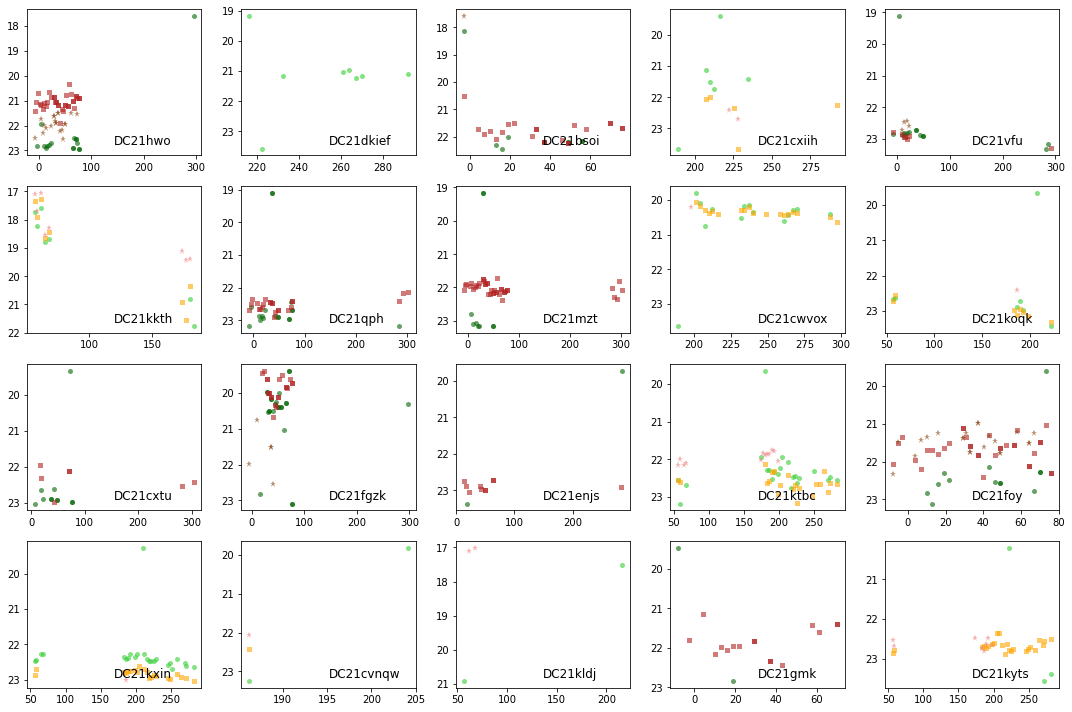

In [22]:
sx = np.flip( np.argsort( paramLC_amp_g ) )

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            cx = np.where( (candLC_candid == paramLC_candid[sx[s]]) & (candLC_filter == filt) )[0]
            if paramLC_field[sx[s]] == 'COSMOS':
                clr_i = f
            elif paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            ax[i,j].plot( candLC_mjd[cx]-59300., candLC_mag[cx], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            del cx
        ax[i,j].invert_yaxis()
        ax[i,j].text(0.50, 0.05, paramLC_candid[sx[s]], fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### The 20 best-sampled in any filter

They're all in COSMOS, which recieved more epochs so far.

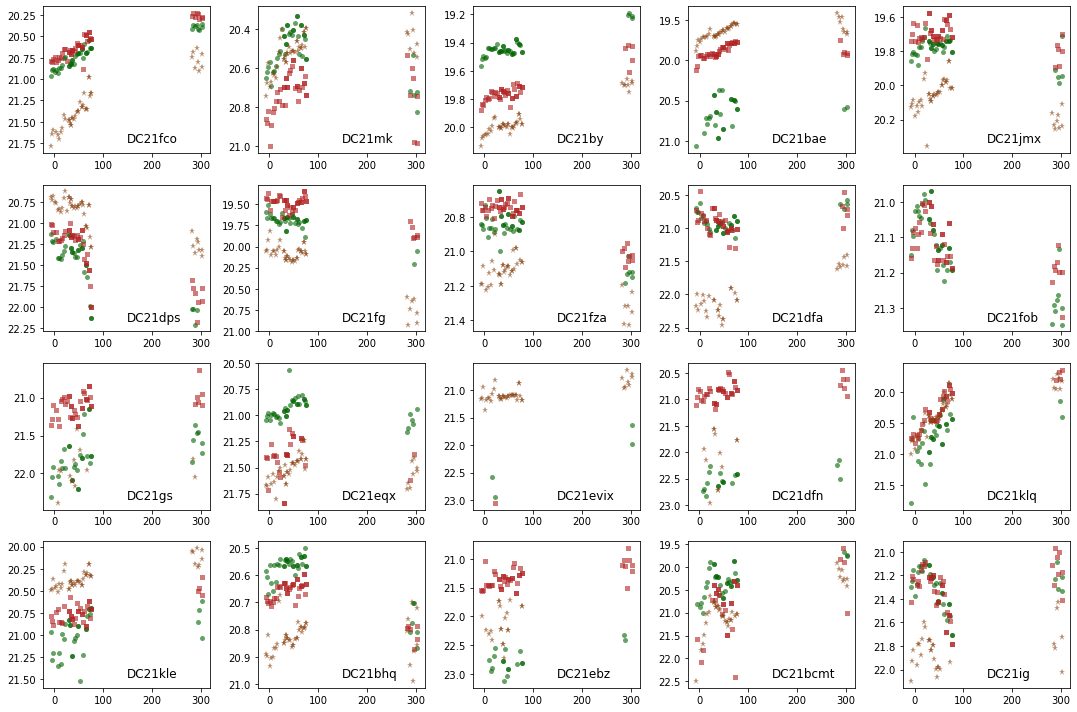

In [23]:
sx = np.flip( np.argsort( paramLC_neps ) )

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            cx = np.where( (candLC_candid == paramLC_candid[sx[s]]) & (candLC_filter == filt) )[0]
            if paramLC_field[sx[s]] == 'COSMOS':
                clr_i = f
            elif paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            ax[i,j].plot( candLC_mjd[cx]-59300., candLC_mag[cx], 
                        sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i])
            del cx
        ax[i,j].invert_yaxis()
        ax[i,j].text(0.50, 0.05, paramLC_candid[sx[s]], fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### A random sample of 20 "transient-Like"

A time span of 20-120 days, and an amplitude of at least 0.5 mag, in _every_ filter.

86


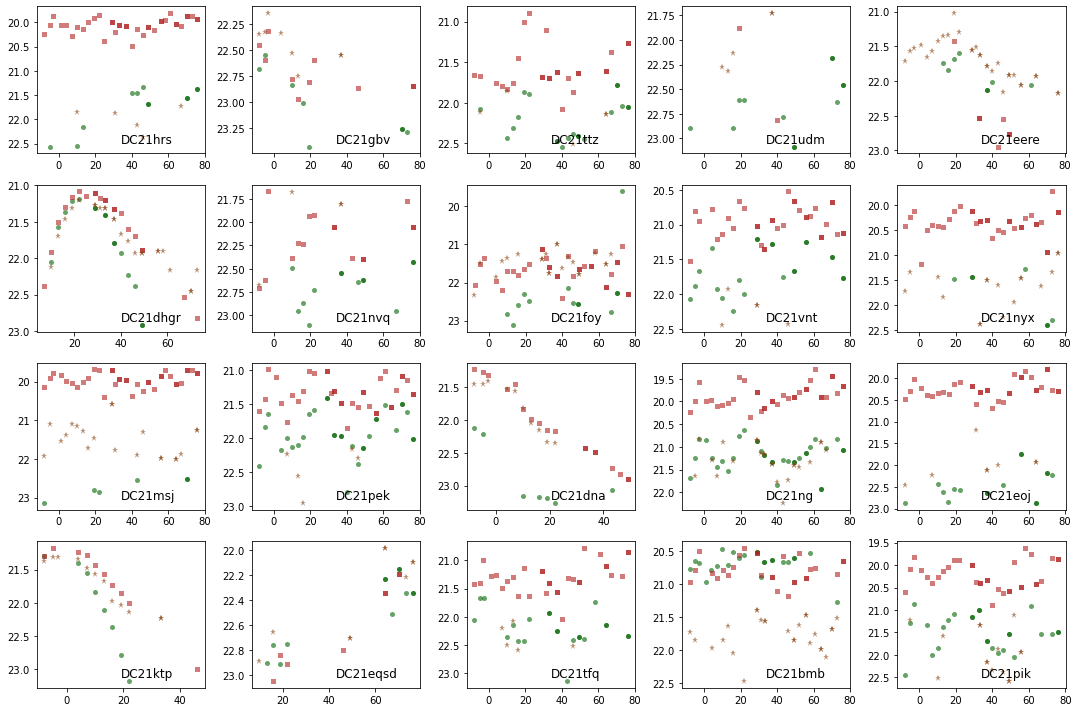

In [24]:
tx = np.where( (paramLC_tspan_g > 20) & (paramLC_tspan_r > 20) & (paramLC_tspan_i > 20) &
               (paramLC_tspan_g < 120) & (paramLC_tspan_r < 120) & (paramLC_tspan_i < 120) &
               (paramLC_amp_g > 0.5) & (paramLC_amp_r > 0.5) & (paramLC_amp_i > 0.5) )[0]
print(len(tx))

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

t = 0
for i in range(4):
    for j in range(5):
        if t < len(tx):
            for f,filt in enumerate(all_filters):
                cx = np.where( (candLC_candid == paramLC_candid[tx[t]]) & (candLC_filter == filt) )[0]
                if paramLC_field[tx[t]] == 'COSMOS':
                    clr_i = f
                elif paramLC_field[tx[t]] == 'ELAIS':
                    clr_i = f+3
                ax[i,j].plot( candLC_mjd[cx]-59300., candLC_mag[cx], 
                            sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i])
                del cx
            ax[i,j].invert_yaxis()
            ax[i,j].text(0.50, 0.05, paramLC_candid[tx[t]], fontsize=12, color='black', 
                         verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
            t += 1

plt.tight_layout()
plt.show()
del tx,t

### A random sample of 20 short-duration bright evolving phenomena

Short timespan (<20 days), reach a peak of at least 22 mag, and an amplitude of at least 0.5 mag.

Display the time span and the amplitude in the upper left corner.

25


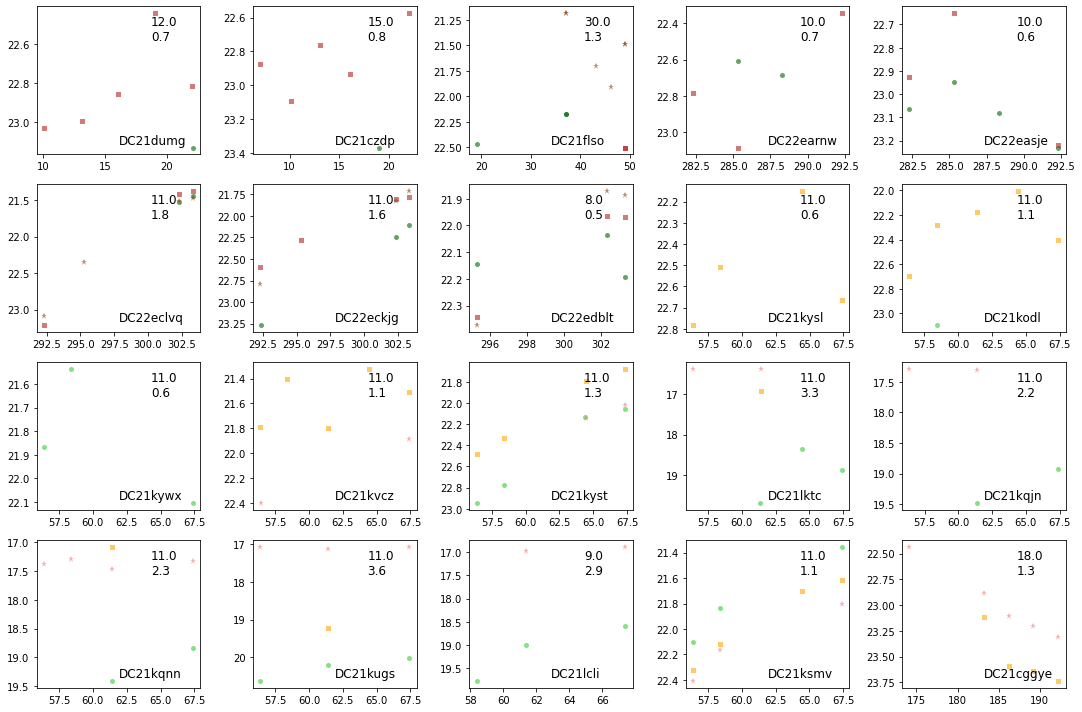

In [26]:
tx = np.where( ((paramLC_tspan_g < 20) & (paramLC_tspan_r < 20) & (paramLC_tspan_i < 20)) &
               ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
               ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)) )[0]
print(len(tx))

fig, ax = plt.subplots( 4, 5, figsize=(15,10), sharex=False, sharey=False )

t = 0
for i in range(4):
    for j in range(5):
        if t < len(tx):
            for f,filt in enumerate(all_filters):
                cx = np.where( (candLC_candid == paramLC_candid[tx[t]]) & (candLC_filter == filt) )[0]
                if paramLC_field[tx[t]] == 'COSMOS':
                    clr_i = f
                elif paramLC_field[tx[t]] == 'ELAIS':
                    clr_i = f+3
                ax[i,j].plot( candLC_mjd[cx]-59300., candLC_mag[cx], 
                            sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i])
                del cx
            ax[i,j].invert_yaxis()
            ax[i,j].text(0.70, 0.85, str(np.round(paramLC_tspan[tx[t]],0)), fontsize=12, color='black', 
                         verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
            ax[i,j].text(0.70, 0.75, str(np.round(paramLC_amp[tx[t]],1)), fontsize=12, color='black', 
                         verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
            ax[i,j].text(0.50, 0.05, paramLC_candid[tx[t]], fontsize=12, color='black', 
                         verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
            t += 1

plt.tight_layout()
plt.show()
del tx,t